In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [77]:
data=pd.read_csv(r'F:\important\Data analyst\Projects\Loan Prediction Analysis ML\train_data.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [78]:
# test=pd.read_csv(r'F:\important\Data analyst\Projects\Loan Prediction Analysis ML\test_data.csv')
# test.head()

In [79]:
data_orginal_data=data.copy()
#test_orginal_data=test.copy()

In [80]:
#12 independent variables and 1 target variable, i.e. Loan_Status in the  dataset.
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [81]:
#test.columns

In [82]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [83]:
data.shape

(614, 13)

In [84]:
#test.shape

In [85]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [86]:
#Normalizing
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

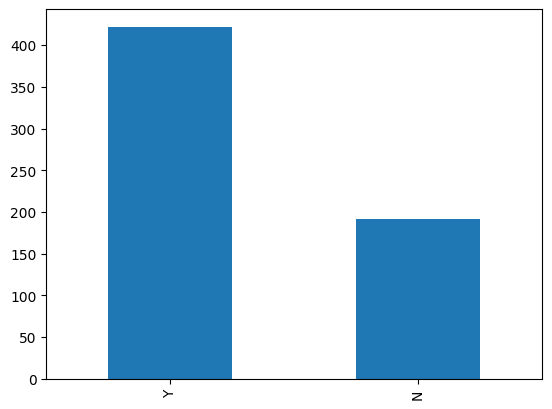

In [87]:
data['Loan_Status'].value_counts().plot.bar()

Independent Variable (Categorical)

<Axes: title={'center': 'Gender'}>

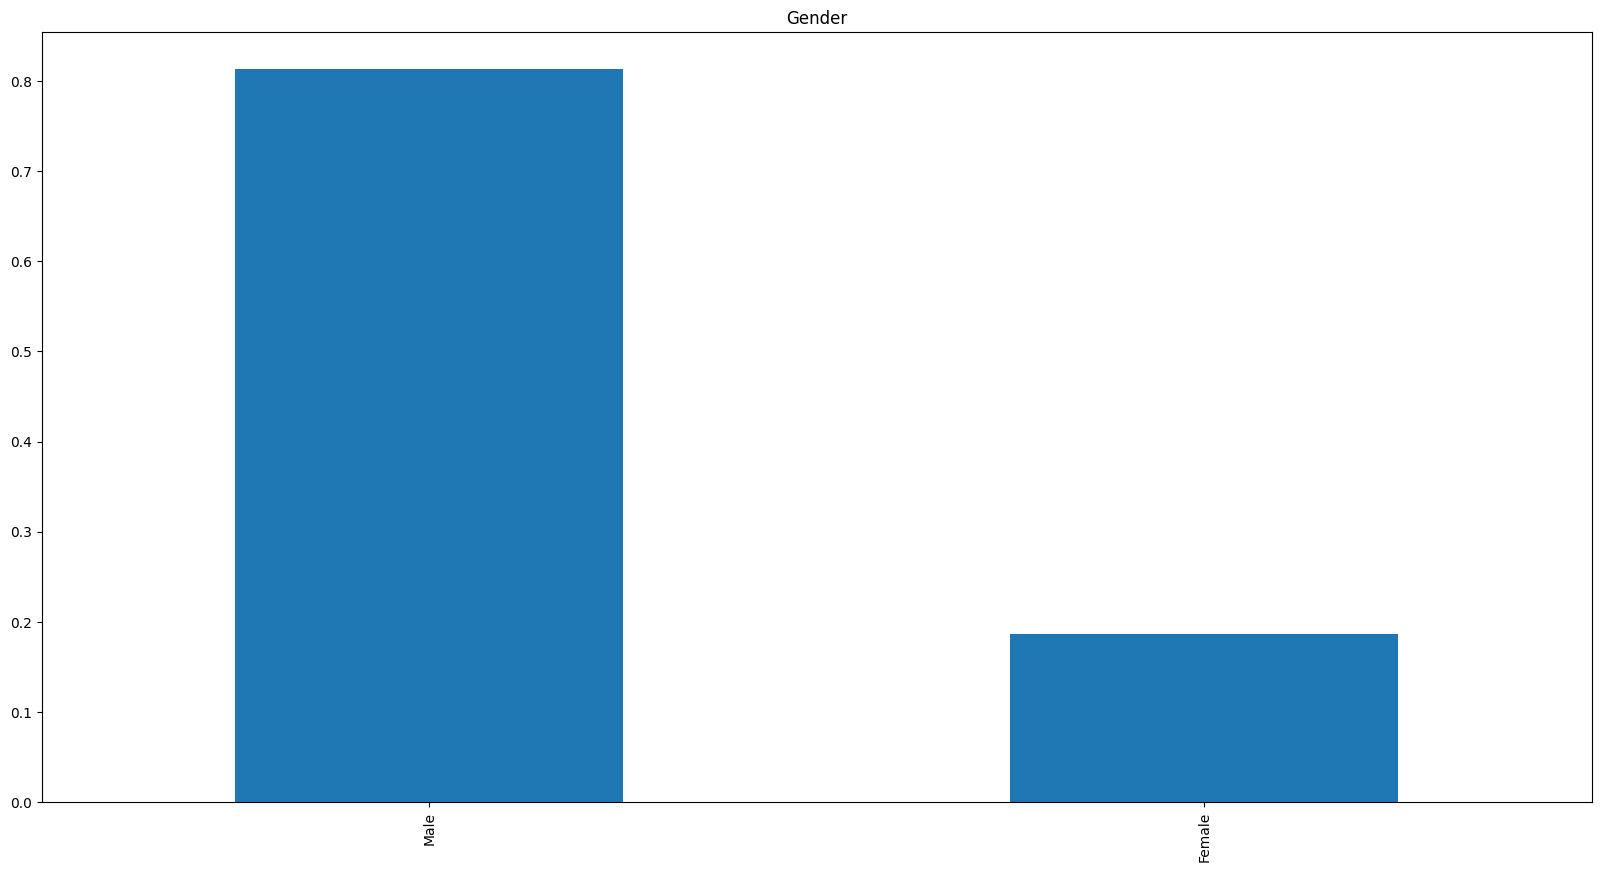

In [88]:
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender',figsize=(20,10))

<Axes: title={'center': 'Married'}>

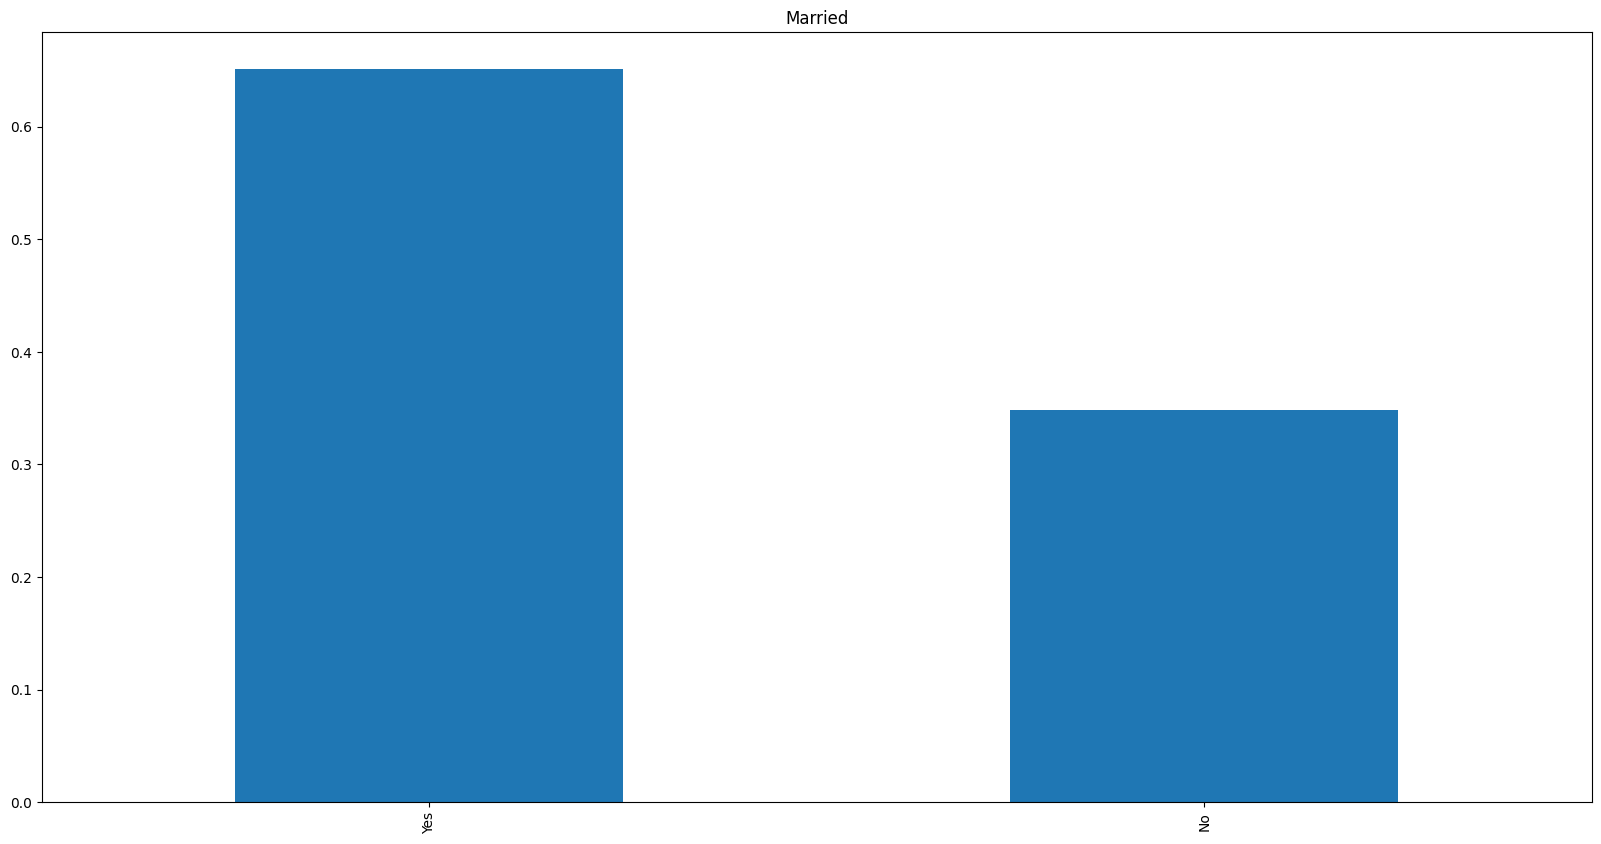

In [89]:
data['Married'].value_counts(normalize=True).plot.bar(title='Married',figsize=(20,10))

Independent Variable (Ordinal)

<Axes: title={'center': 'Dependents'}>

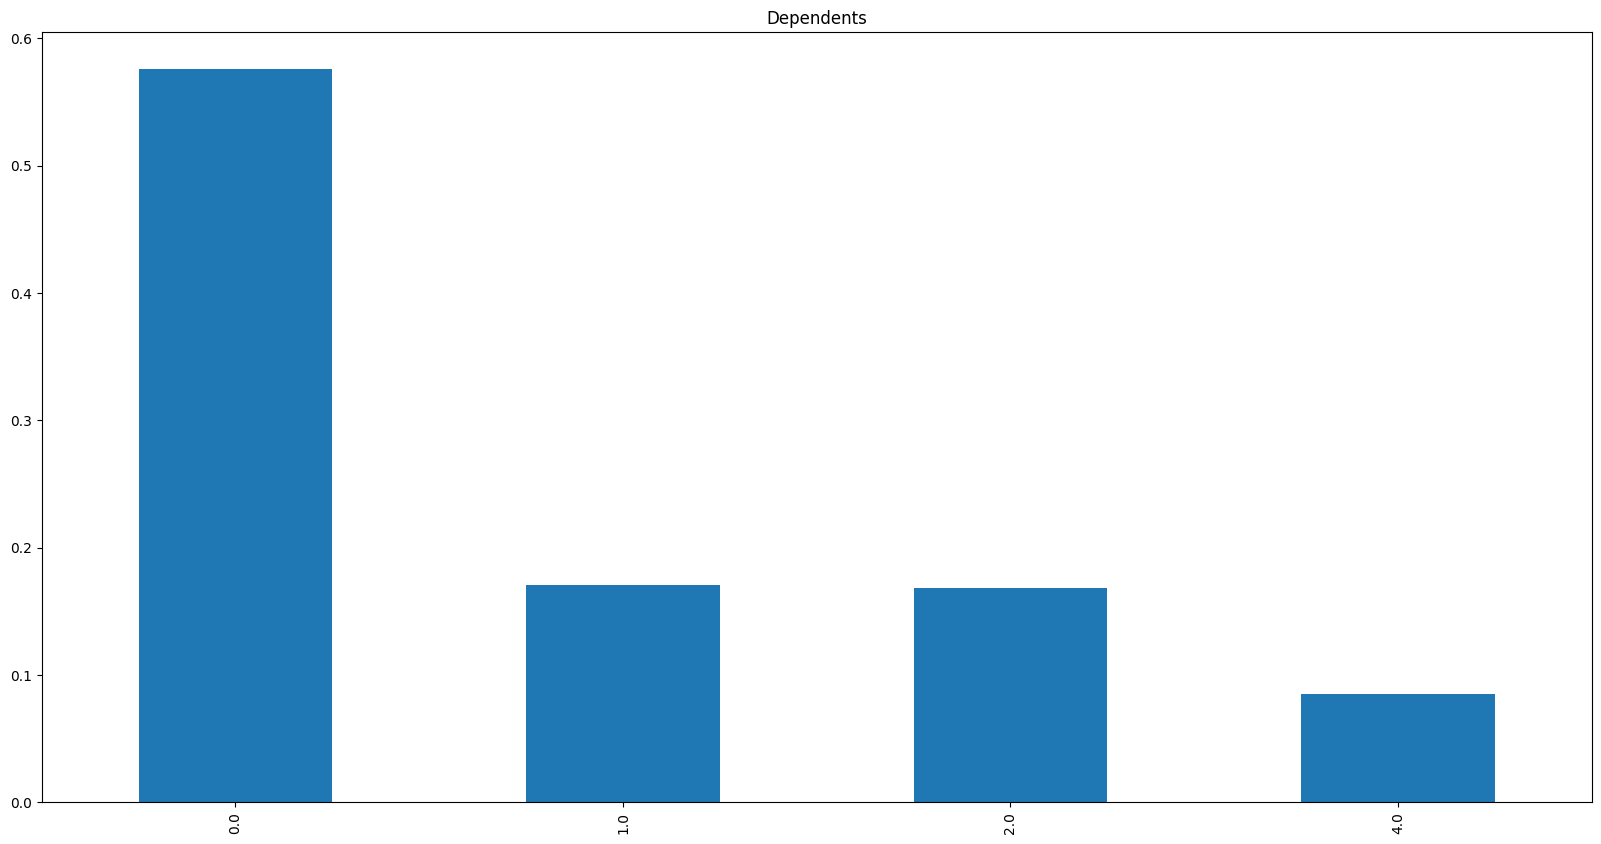

In [90]:
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents',figsize=(20,10))

<Axes: title={'center': 'Education'}>

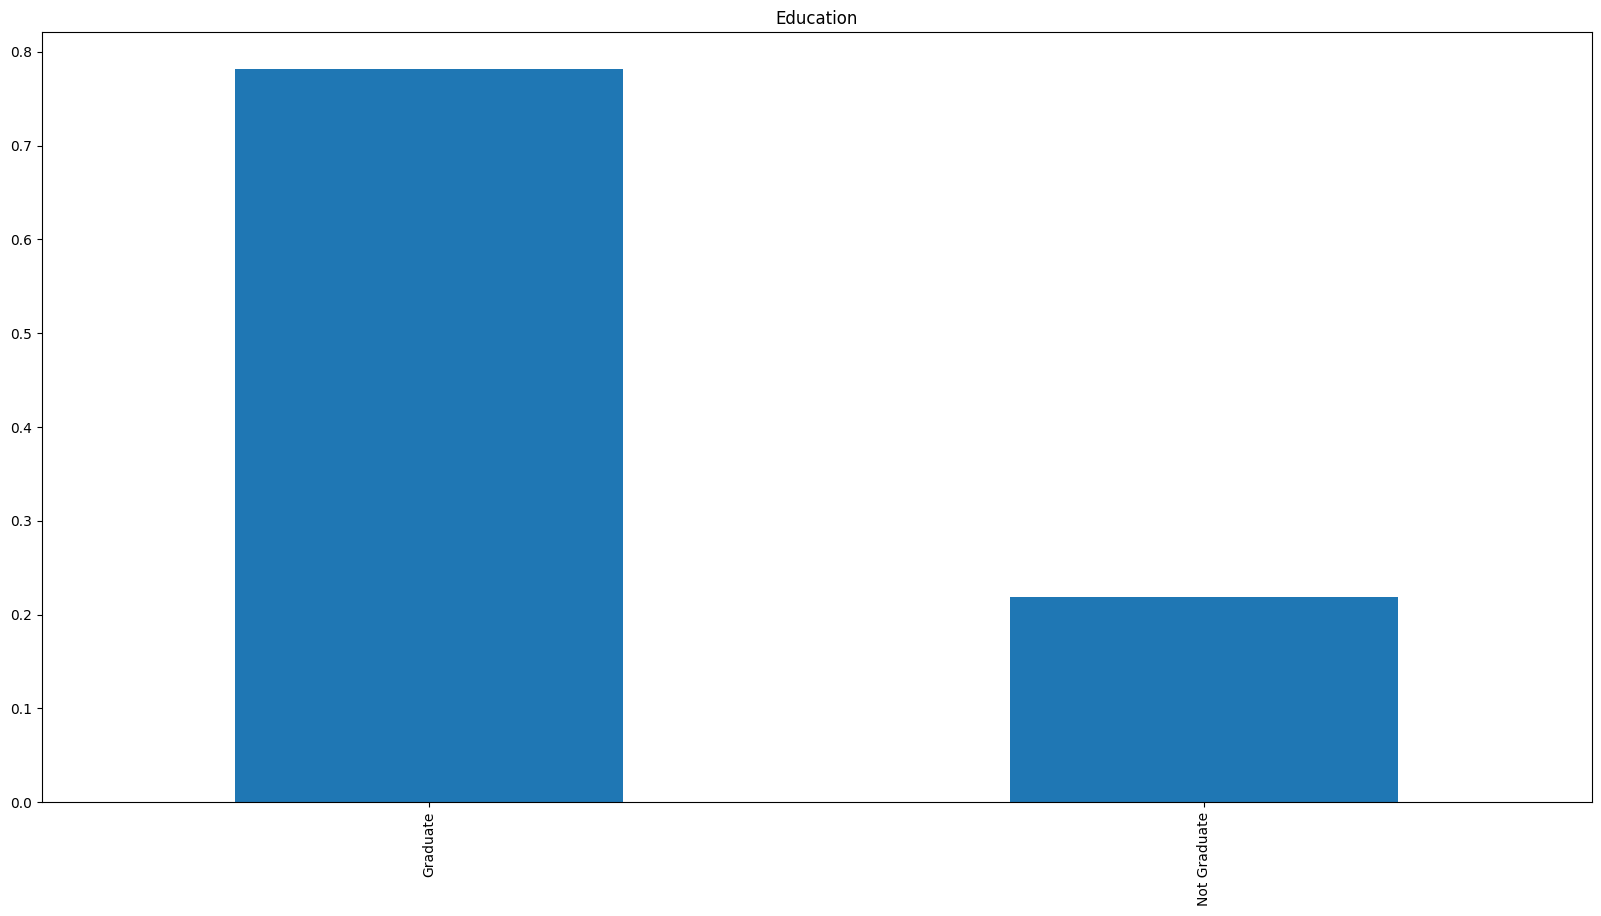

In [91]:
data['Education'].value_counts(normalize=True).plot.bar(title='Education',figsize=(20,10))

Independent Variable (Numerical)

C:\Users\Arunprasath Manickam\AppData\Local\Temp\ipykernel_16092\1550950910.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

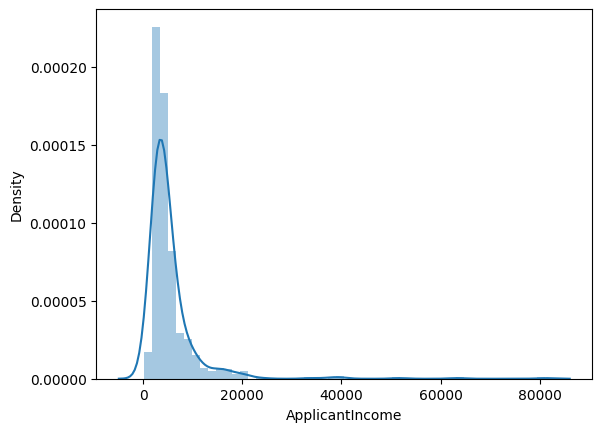

In [92]:
sns.distplot(data['ApplicantIncome'])

<Axes: >

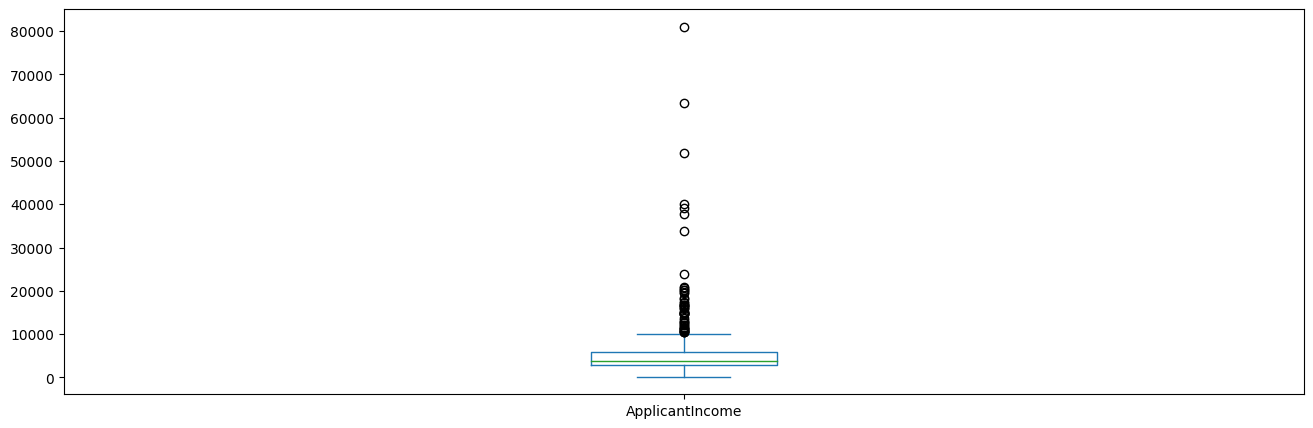

In [93]:
data['ApplicantIncome'].plot.box(figsize=(16,5))

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

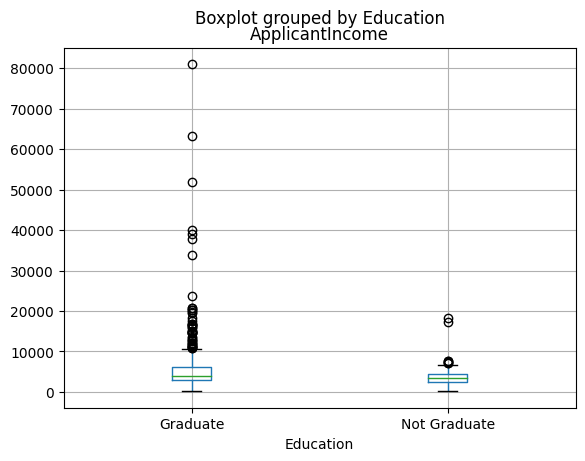

In [94]:
data.boxplot(column='ApplicantIncome',by='Education')

Missing value imputation

In [95]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)
data['Married'].fillna(data['Married'].mode()[0],inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0],inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0],inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0],inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)


In [97]:
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [98]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

In [99]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

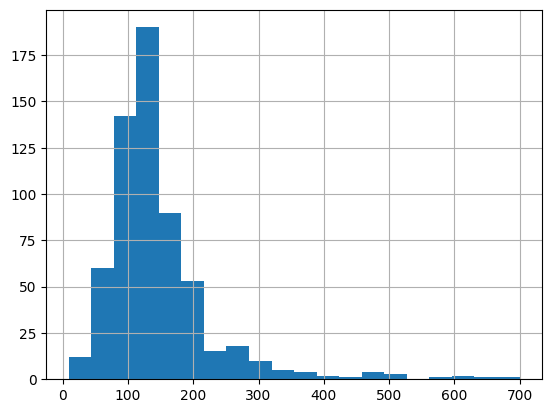

In [100]:
data['LoanAmount'].hist(bins=20)

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation.

<Axes: >

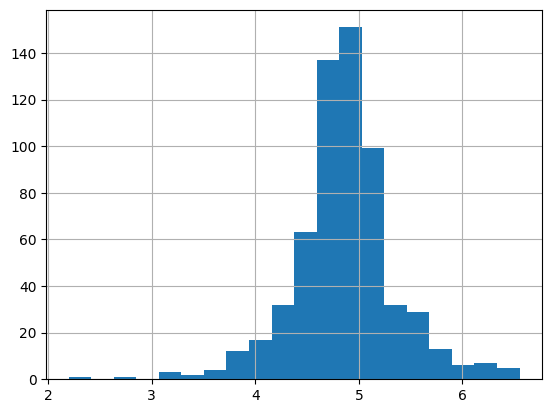

In [101]:
data['LoanAmount_log']=np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

Model Building


In [102]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
# drop unnecessary columns
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", 'Loan_ID','LoanAmount_log']
data = data.drop(columns=cols, axis=1)
data.head()
     


,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,1.0,Urban,Y


In [104]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Self_Employed'] 		= label.fit_transform(data['Self_Employed']).astype(str)

label = LabelEncoder()
data['Education']		 	= label.fit_transform(data['Education']).astype(str)

label = LabelEncoder()
data['Married'] 			= label.fit_transform(data['Married']).astype(str)

label = LabelEncoder()
data['Gender'] 				= label.fit_transform(data['Gender']).astype(str)

label = LabelEncoder()
data['Property_Area'] 		= label.fit_transform(data['Property_Area']).astype(str)

label = LabelEncoder()
data['Loan_Status'] 		= label.fit_transform(data['Loan_Status']).astype(str)


data
    

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,1.0,2,1
1,1,1,1.0,0,0,1.0,0,0
2,1,1,0.0,0,1,1.0,2,1
3,1,1,0.0,1,0,1.0,2,1
4,1,0,0.0,0,0,1.0,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,1.0,0,1
610,1,1,4.0,0,0,1.0,0,1
611,1,1,1.0,0,0,1.0,2,1
612,1,1,2.0,0,0,1.0,2,1


In [105]:
x=data.iloc[:,1:8].values
print(x)

[['0' 0.0 '0' ... 1.0 '2' '1']
 ['1' 1.0 '0' ... 1.0 '0' '0']
 ['1' 0.0 '0' ... 1.0 '2' '1']
 ...
 ['1' 1.0 '0' ... 1.0 '2' '1']
 ['1' 2.0 '0' ... 1.0 '2' '1']
 ['0' 0.0 '0' ... 0.0 '1' '0']]


In [121]:
y=data.iloc[:,7].values
print(y)

['1' '0' '1' '1' '1' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '1' '1' '0'
 '0' '1' '0' '1' '0' '0' '0' '1' '1' '1' '0' '1' '0' '0' '0' '1' '0' '1'
 '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '0' '1' '1' '1' '0' '0'
 '0' '1' '1' '0' '1' '1' '1' '1' '0' '0' '0' '0' '0' '1' '1' '0' '1' '1'
 '1' '0' '1' '0' '0' '0' '0' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '0'
 '0' '1' '1' '1' '0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '0' '1' '1' '1' '1' '1' '0' '0' '1' '0' '0' '0' '1' '1' '1'
 '1' '1' '1' '1' '0' '1' '0' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1' '0'
 '0' '1' '1' '1' '0' '1' '0' '1' '1' '1' '0' '1' '0' '1' '1' '0' '1' '0'
 '0' '0' '1' '0' '1' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '0' '1' '1'
 '1' '0' '1' '1' '0' '1' '1' '1' '1' '1' '1' '0' '0' '0' '1' '1' '1' '1'
 '0' '1' '0' '1' '0' '1' '1' '1' '1' '0' '0' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '0' '1' '1' '1' '1' '0' '1' '1' '1' '0' '1

In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [110]:
#perceptron
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


perceptron = Perceptron()
perceptron.fit(x_train,y_train)

pred = perceptron.predict(x_test)

print(f'Accuracy :  {accuracy_score(y_test,pred)} \n')

print(f'Confusion Matrix : \n{confusion_matrix(y_test,pred)}')

print("\n")
print(f'Report : \n{classification_report(y_test,pred)}')

     


Accuracy :  0.9935064935064936 

Confusion Matrix : 
[[ 42   1]
 [  0 111]]


Report : 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      1.00       111

    accuracy                           0.99       154
   macro avg       1.00      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [111]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

pred = log.predict(x_test)

print(f'Accuracy :  {accuracy_score(y_test,pred)} \n')

print(f'Confusion Matrix : \n{confusion_matrix(y_test,pred)}')

print("\n")
print(f'Report : \n{classification_report(y_test,pred)}')

     


Accuracy :  1.0 

Confusion Matrix : 
[[ 43   0]
 [  0 111]]


Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [112]:
#knn
from sklearn.metrics import roc_curve
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train , y_train)

ypredict = knn.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,ypredict)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,ypredict)}')

print(classification_report(y_test, ypredict))

confustion matrix : 
[[ 42   1]
 [  0 111]]


Accuracy : 0.9935064935064936
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      1.00       111

    accuracy                           0.99       154
   macro avg       1.00      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154



In [113]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
predict = dtc.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,predict)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,predict)}')

print(classification_report(y_test, predict))


     


confustion matrix : 
[[ 43   0]
 [  0 111]]


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [114]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', max_iter=1000, gamma='auto')
clf.fit(x_train, y_train)
pred = clf.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,pred)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,pred)}')

print(classification_report(y_test, pred))


confustion matrix : 
[[ 43   0]
 [  0 111]]


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [115]:
svc = SVC(kernel = 'poly',max_iter=1000,gamma='auto')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,pred)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,pred)}')

print(classification_report(y_test, pred))

confustion matrix : 
[[ 43   0]
 [  2 109]]


Accuracy : 0.987012987012987
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.98      0.99       111

    accuracy                           0.99       154
   macro avg       0.98      0.99      0.98       154
weighted avg       0.99      0.99      0.99       154



In [116]:


svc = SVC(kernel = 'rbf',max_iter=1000,gamma='auto')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,pred)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,pred)}')

print(classification_report(y_test, pred))
     


confustion matrix : 
[[ 43   0]
 [  0 111]]


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



In [117]:

svc = SVC(kernel = 'sigmoid',max_iter=1000,gamma='auto')
svc.fit(x_train, y_train)
pred = svc.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,pred)}')
print("\n")
print(f'Accuracy : {metrics.accuracy_score(y_test,pred)}')

print(classification_report(y_test, pred))

confustion matrix : 
[[ 38   5]
 [  7 104]]


Accuracy : 0.922077922077922
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        43
           1       0.95      0.94      0.95       111

    accuracy                           0.92       154
   macro avg       0.90      0.91      0.90       154
weighted avg       0.92      0.92      0.92       154



In [118]:


#Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
gaussian = GaussianNB()
classifier = gaussian.fit(x_train, y_train)
pred = classifier.predict(x_test)

print(f'confustion matrix : \n{confusion_matrix(y_test,pred)}')

print("\n")

print(f'Accuracy : {metrics.accuracy_score(y_test,pred)}')

print(classification_report(y_test, pred))
     


confustion matrix : 
[[ 43   0]
 [  0 111]]


Accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00       111

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154



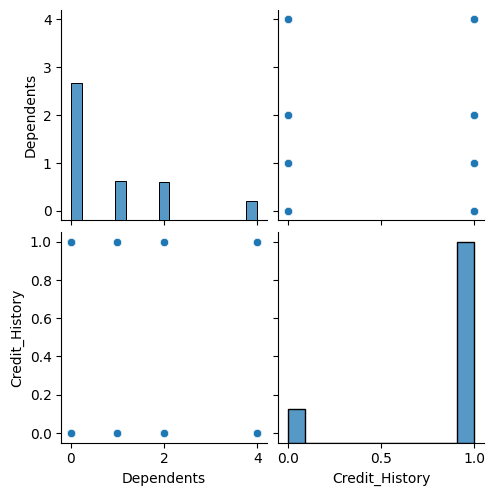

In [119]:

sns.pairplot(data)